<a href="https://colab.research.google.com/github/PaulGeorge124/CSEL-302/blob/main/Assesment_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
data = pd.read_csv("onlinefoods.csv")

print(data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

Handle Missing Values

In [ ]:
data['Monthly Income'] = data['Monthly Income'].replace('No Income', np.nan)

In [ ]:
income_map = {
    'Less than 25000': 12500,
    '25001 to 50000': 37500,
    '50001 to 75000': 62500,
    '75001 to 100000': 87500,
    'More than 100000': 110000
}
data['Monthly Income'] = data['Monthly Income'].map(income_map)

In [ ]:
print(data.isnull().sum())


data.fillna(data.mode().iloc[0], inplace=True)

Age                             0
Gender                          0
Marital Status                  0
Occupation                      0
Monthly Income                319
Educational Qualifications      0
Family size                     0
latitude                        0
longitude                       0
Pin code                        0
Output                          0
Feedback                        0
Unnamed: 12                     0
dtype: int64


In [ ]:
numeric_features = ['Age', 'Monthly Income']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

ENCODE CATEGORICAL VALUES

In [ ]:
data_encoded = pd.get_dummies(data, columns=['Gender', 'Marital Status', 'Occupation'])

Feature Selection

In [ ]:
features = data.drop(['Feedback', 'Gender'], axis=1)
target = data['Feedback']

Part 2: Exploratory Data Analysis (EDA)

DESCRIPTIVE STATISTICS

In [ ]:
print(data.describe())

              Age  Monthly Income  Family size    latitude   longitude  \
count  388.000000            69.0   388.000000  388.000000  388.000000   
mean    24.628866         37500.0     3.280928   12.972058   77.600160   
std      2.975593             0.0     1.351025    0.044489    0.051354   
min     18.000000         37500.0     1.000000   12.865200   77.484200   
25%     23.000000         37500.0     2.000000   12.936900   77.565275   
50%     24.000000         37500.0     3.000000   12.977000   77.592100   
75%     26.000000         37500.0     4.000000   12.997025   77.630900   
max     33.000000         37500.0     6.000000   13.102000   77.758200   

            Pin code  
count     388.000000  
mean   560040.113402  
std        31.399609  
min    560001.000000  
25%    560010.750000  
50%    560033.500000  
75%    560068.000000  
max    560109.000000  


Visualizations

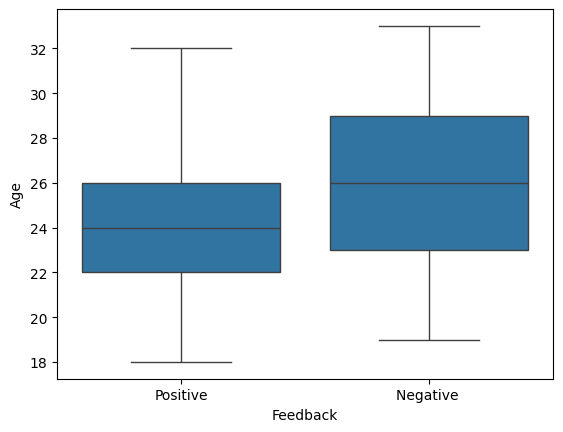

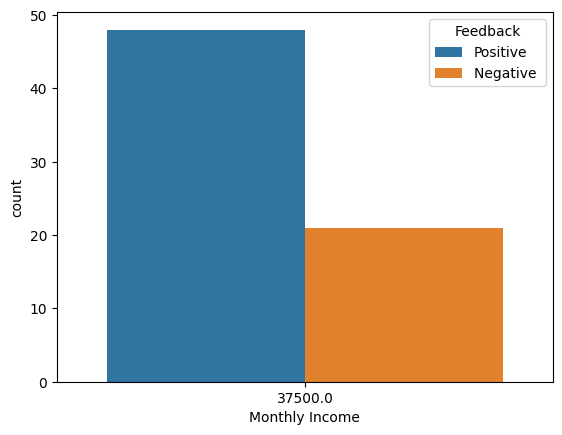

<ipython-input-9-89ec0237c8ef>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_encoded.corr()


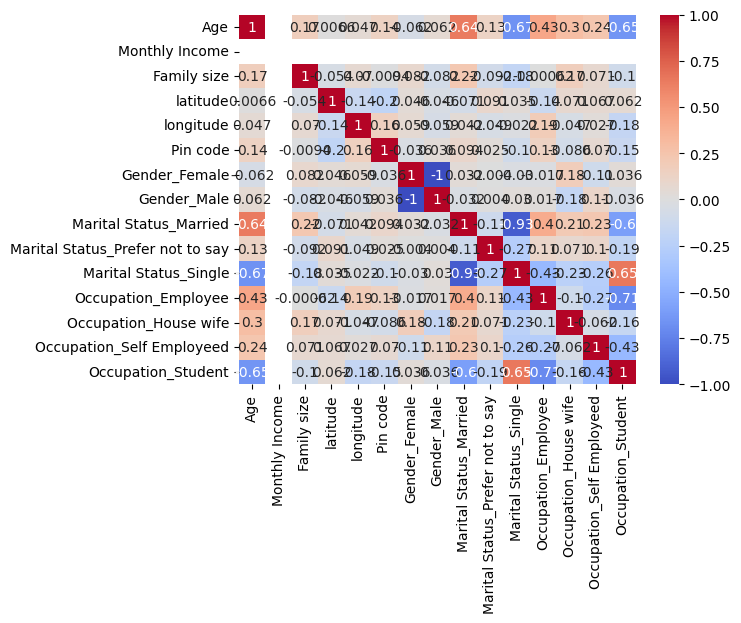

In [ ]:
sns.boxplot(x='Feedback', y='Age', data=data)
plt.show()

# Proportions of Feedback across different levels of Monthly Income
sns.countplot(x='Monthly Income', hue='Feedback', data=data)
plt.show()

# Correlation matrix heatmap
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Part 3: Logistic Regression Model

Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Build the Model

In [ ]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
clf.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

Model Evaluation

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)


print("Confusion Matrix:\n", conf_matrix)

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
y_test = y_test.str.strip()

precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8589743589743589
Precision: 0.8589743589743589
Recall: 1.0
Confusion Matrix:
 [[ 0 11]
 [ 0 67]]


Part 4: Data Analysis and Visualization

In [ ]:
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_features)
all_feature_names = numeric_features + list(feature_names)

In [ ]:
coefficients = clf.named_steps['classifier'].coef_[0]

In [ ]:
print("Number of features:", len(all_feature_names))
print("Number of coefficients:", len(coefficients))

Number of features: 9
Number of coefficients: 9


In [ ]:
if len(all_feature_names) != len(coefficients):
    print("Error: Number of features does not match number of coefficients!")

In [ ]:
if len(all_feature_names[:-1]) != len(coefficients):

all_feature_names = all_feature_names[:len(coefficients)]

feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})


In [ ]:
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

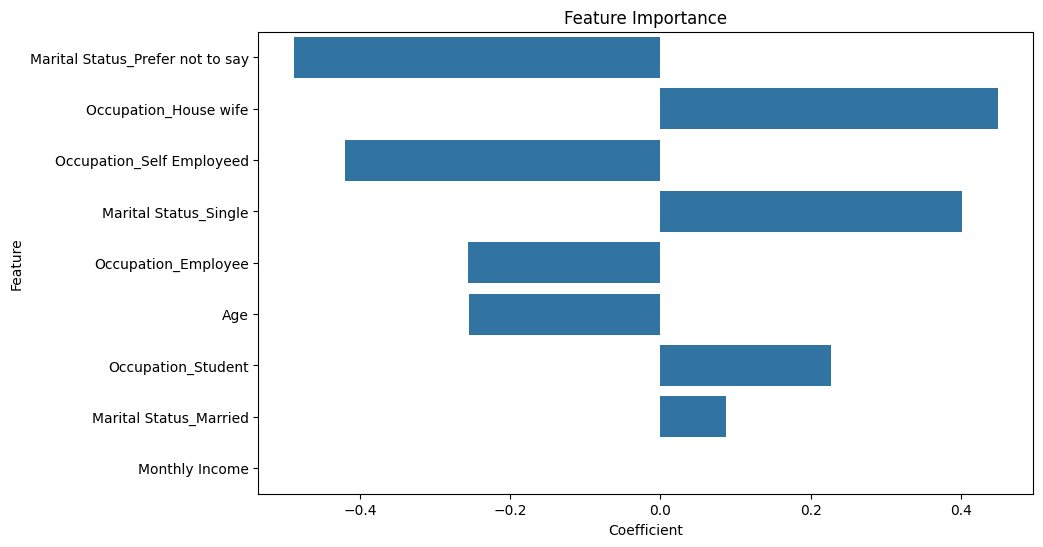

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

PREDICTION INSIGHTS

In [ ]:
predicted_probabilities = clf.predict_proba(X_test)[:, 1]

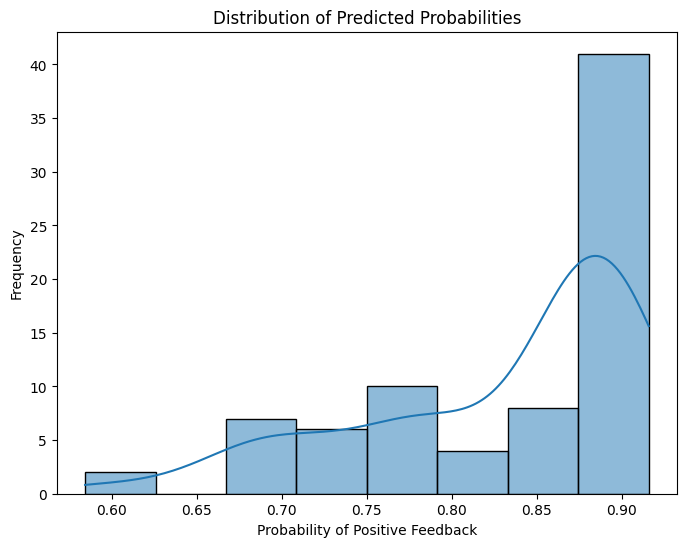

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(predicted_probabilities, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability of Positive Feedback')
plt.ylabel('Frequency')
plt.show()